In [33]:
# View "PhotoObj"
# objid = Object Identifier
# ra = J2000 Right Ascension (r-band)
# dec = J2000 Declination (r-band)
# Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

# Source: https://en.wikipedia.org/wiki/Right_ascension

# u = better of DeV/Exp magnitude fit
# g = better of DeV/Exp magnitude fit
# r = better of DeV/Exp magnitude fit
# i = better of DeV/Exp magnitude fit
# z = better of DeV/Exp magnitude fit
# The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

# Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

# run = Run Number
# rereun = Rerun Number
# camcol = Camera column
# field = Field number
# Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

# run number, which identifies the specific scan,
# the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
# the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
# An additional number, rerun, specifies how the image was processed.
# View "SpecObj"
# specobjid = Object Identifier
# class = object class (galaxy, star or quasar object)
# The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

# redshift = Final Redshift
# plate = plate number
# mjd = MJD of observation
# fiberid = fiber ID
# In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

# Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

# Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

# The SDSS spectrograph uses optical fibers to direct the light 

In [34]:
# Libraries imported
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv("Skyserver_2019.csv", header=0)
df.head()

objid          ra        dec         u         g         r  \
0  1237666301628060000   47.372545   0.820621  18.69254  17.13867  16.55555   
1  1237673706652430000  116.303083  42.455980  18.47633  17.30546  17.24116   
2  1237671126974140000  172.756623  -8.785698  16.47714  15.31072  15.55971   
3  1237665441518260000  201.224207  28.771290  18.63561  16.88346  16.09825   
4  1237665441522840000  212.817222  26.625225  18.88325  17.87948  17.47037   

          i         z   run  rerun  camcol  field            specobjid  \
0  16.34662  16.17639  4849    301       5    771  8168632633242440000   
1  17.32780  17.37114  6573    301       6    220  9333948945297330000   
2  15.72207  15.82471  5973    301       1     13  3221211255238850000   
3  15.70987  15.43491  4649    301       3    121  2254061292459420000   
4  17.17441  17.05235  4649    301       3    191  2390305906828010000   

    class  redshift  plate    mjd  fiberid  
0    STAR  0.000115   7255  56597      832  
1    STAR -0.000093   8290  57364      868  
2    STAR  0.000165   2861  54583       42  
3  GALAXY  0.058155   2002  53471       35  
4  GALAXY  0.072210   2123  53793       74

In [36]:
count_dict = dict(df["class"].value_counts())
cats = list(count_dict.keys())
cats = list(map(lambda x: x.lower().capitalize(), cats))
counts = list(count_dict.values())

In [37]:
# For a Flask route to JSONIFY data
# data = [{"Class":cats[0],"Counts":int(counts[0])},{"Class":cats[1],"Counts":int(counts[1])},{"Class":cats[2],"Counts":int(counts[2])}]

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

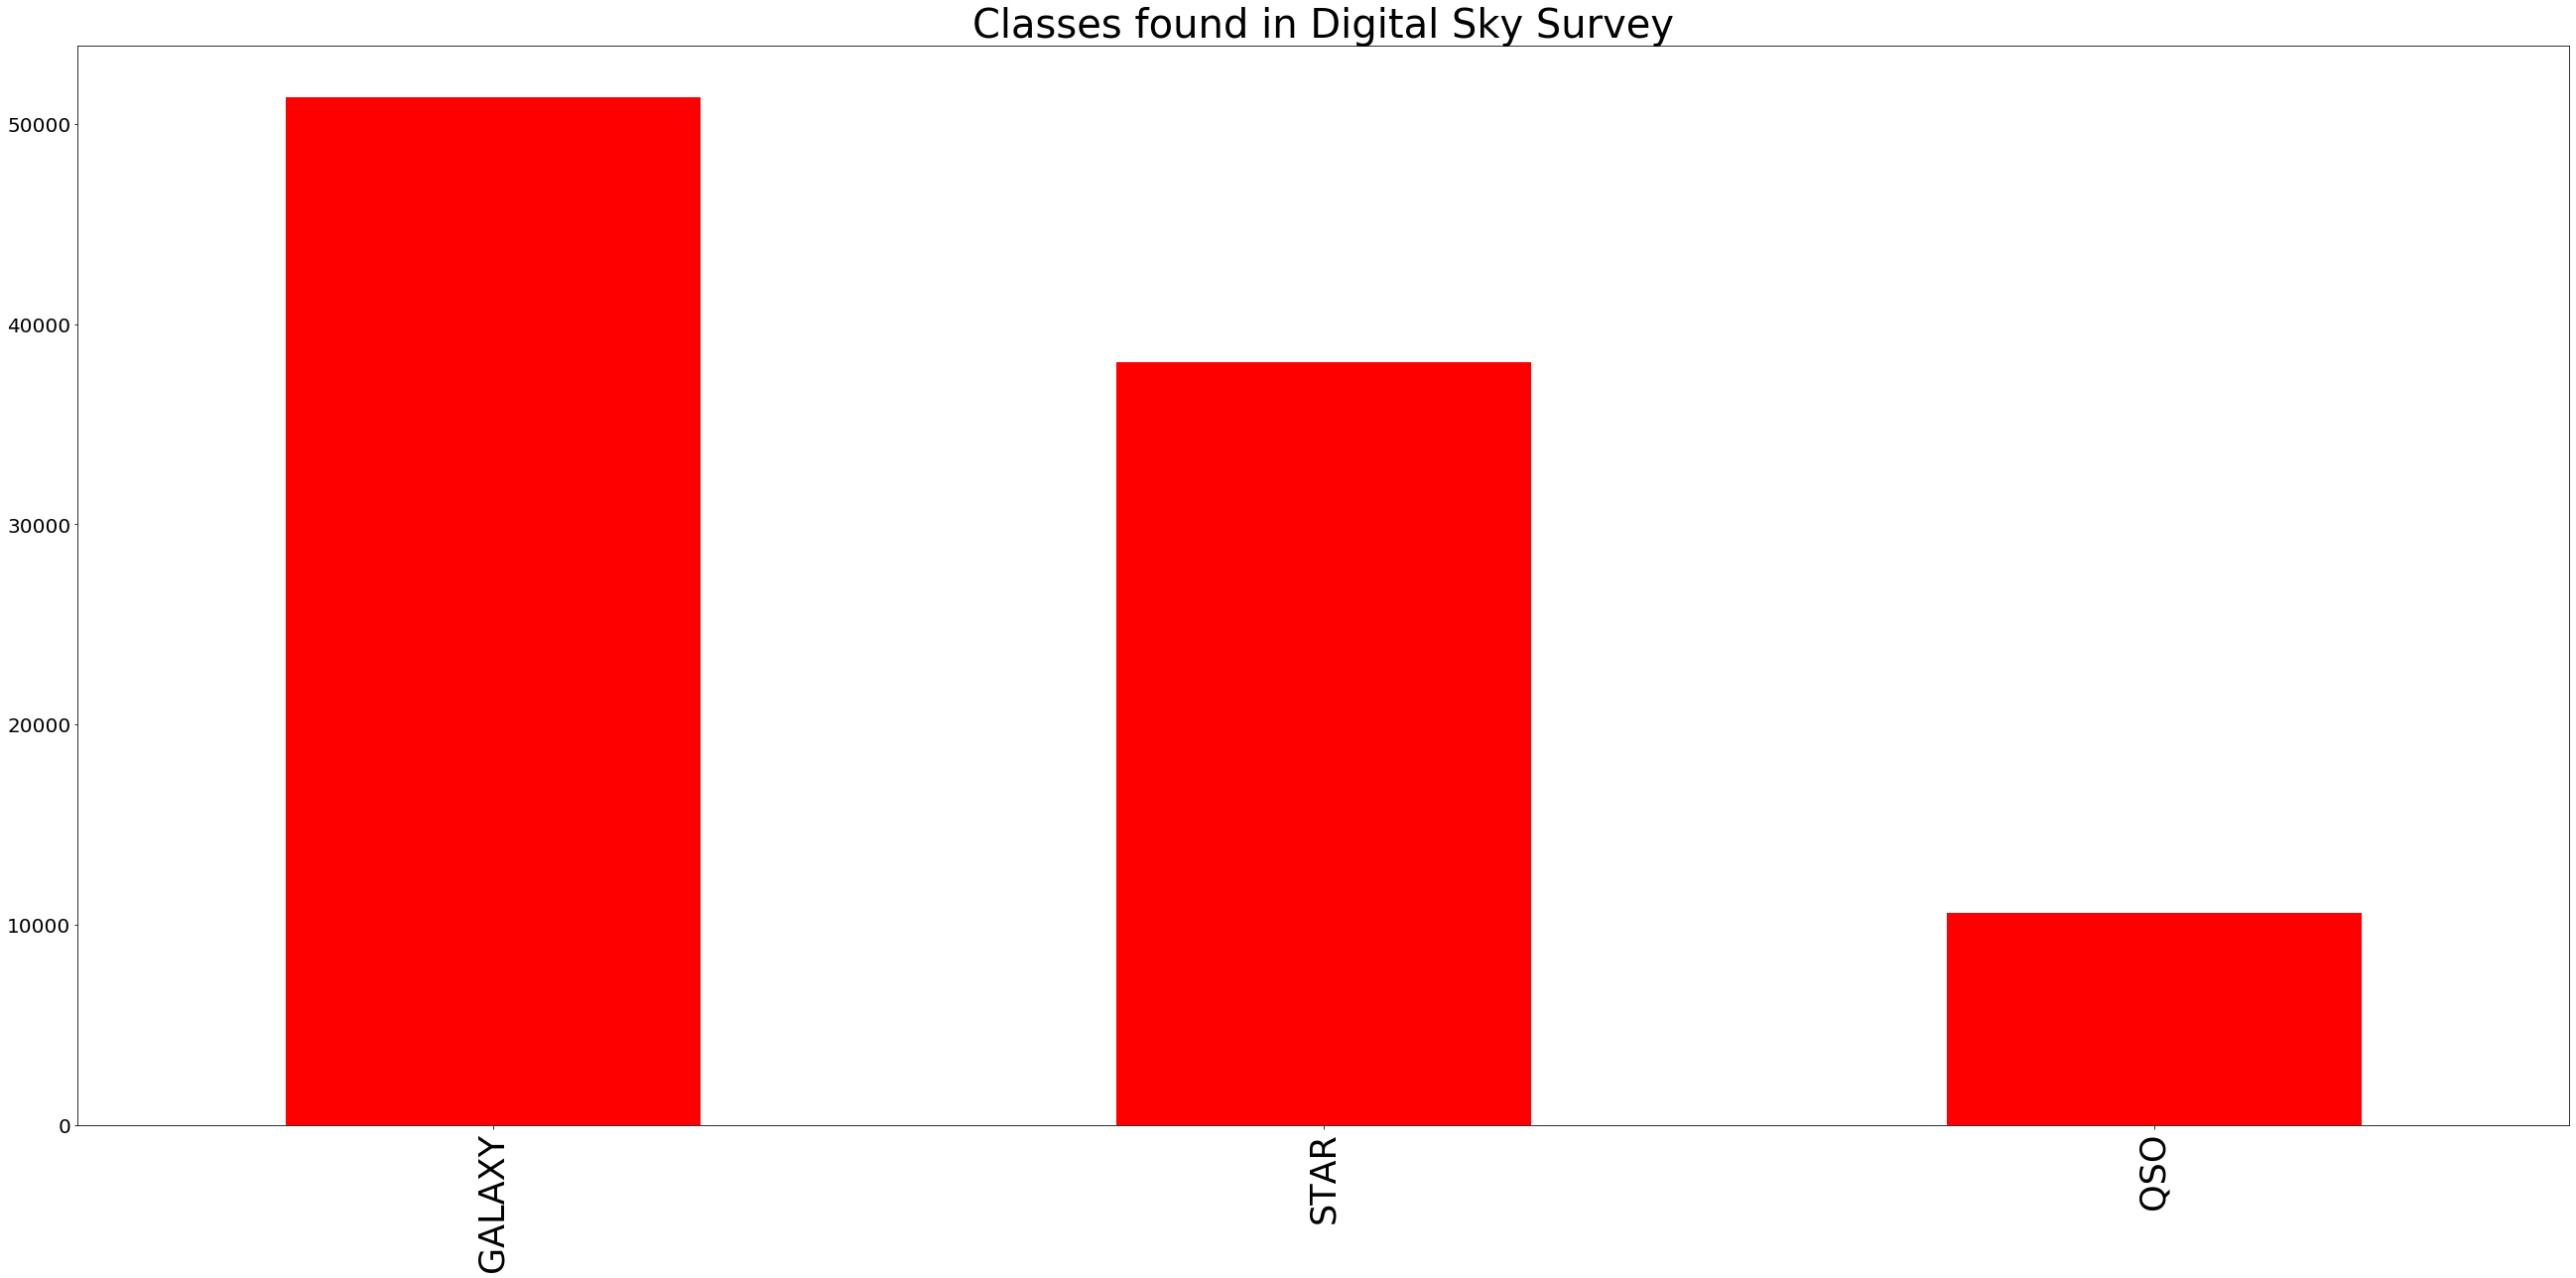

In [38]:
# Bar Plot for number of classes in the survey

plt.figure(num=0,figsize=(45,20))
df["class"].value_counts().plot(kind="bar", facecolor="red")
plt.title("Classes found in Digital Sky Survey", fontdict={'size':40})
# plt.ylabel("Number Found", fontdict={'size':30})
# plt.xlabel("Class", fontdict={'size':30})
plt.xticks(fontsize=35)
plt.yticks(fontsize=20)


In [39]:
# Number of Each Class
classes = df["class"].value_counts()
classes

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

In [41]:
# Group Classes by Mean
grouped_df = df.groupby(["class"]).mean()
grouped_df

objid          ra        dec          u          g          r  \
class                                                                          
GALAXY  1.237662e+18  182.148200  24.804938  18.761533  17.305991  16.613579   
QSO     1.237663e+18  175.076882  25.936254  18.964231  18.680906  18.496170   
STAR    1.237663e+18  171.944778  25.139392  18.380744  17.189594  16.794439   

                i          z          run  rerun    camcol       field  \
class                                                                    
GALAXY  16.245213  15.995537  3801.675798  301.0  3.252596  194.995168   
QSO     18.366278  18.287909  4145.918439  301.0  3.296191  184.862017   
STAR    16.654419  16.596633  4170.815676  301.0  3.296698  177.460783   

                  specobjid  redshift        plate           mjd     fiberid  
class                                                                         
GALAXY  1906263580473246720  0.078092  1693.024141  53240.761121  319.426242  
QSO     4264890322219324416  1.234138  3787.888952  54588.924960  387.179756  
STAR    3896171611968002048 -0.000110  3460.407812  54633.291448  359.073026

In [42]:
grouped_df.to_csv('mean.csv')

In [55]:
# Now sending for JavaScript file
grouped_df_js = df[['ra','dec','u','g','r','i','z','redshift','class']]
grouped_df_js = grouped_df_js.groupby(["class"]).mean()
grouped_df_js = grouped_df_js.round(decimals=2)
grouped_df_js.to_csv("static/csv/mean.csv")

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

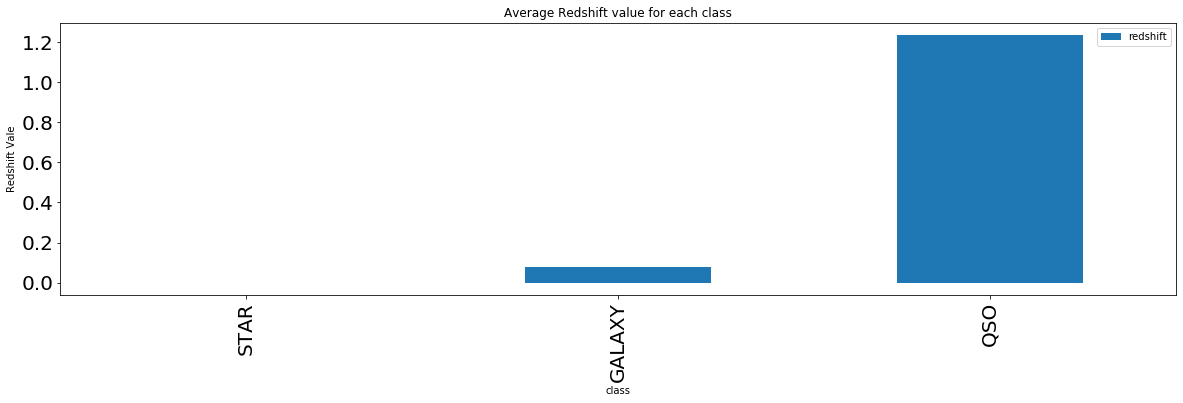

In [10]:
# REDSHIFT (AVERAGE) PLOT 
# plt.figure(num=1, figsize=(34,20))
grouped_df[['redshift']].sort_values(by='redshift').plot(kind="bar", figsize=(20,5))
plt.title("Average Redshift value for each class")
plt.ylabel("Redshift Vale")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [11]:
# For another Flask Route to JSONFIY Redshift data 

json = grouped_df[['redshift']].sort_values(by='redshift')
list(json.values[2])
list(json.index)


['STAR', 'GALAXY', 'QSO']

In [12]:
data = [{"Class":list(json.index)[0],"Redshift":float(list(json.values[0])[0])},{"Class":list(json.index)[1],"Redshift":float(list(json.values[1])[0])},{"Class":list(json.index)[2],"Redshift":float(list(json.values[2])[0])}]
data

[{'Class': 'STAR', 'Redshift': -0.00011037712726494982},
 {'Class': 'GALAXY', 'Redshift': 0.07809210755001678},
 {'Class': 'QSO', 'Redshift': 1.2341382938645484}]

In [13]:
# Currating the original df
df.head()

objid          ra        dec         u         g         r  \
0  1237666301628060000   47.372545   0.820621  18.69254  17.13867  16.55555   
1  1237673706652430000  116.303083  42.455980  18.47633  17.30546  17.24116   
2  1237671126974140000  172.756623  -8.785698  16.47714  15.31072  15.55971   
3  1237665441518260000  201.224207  28.771290  18.63561  16.88346  16.09825   
4  1237665441522840000  212.817222  26.625225  18.88325  17.87948  17.47037   

          i         z   run  rerun  camcol  field            specobjid  \
0  16.34662  16.17639  4849    301       5    771  8168632633242440000   
1  17.32780  17.37114  6573    301       6    220  9333948945297330000   
2  15.72207  15.82471  5973    301       1     13  3221211255238850000   
3  15.70987  15.43491  4649    301       3    121  2254061292459420000   
4  17.17441  17.05235  4649    301       3    191  2390305906828010000   

    class  redshift  plate    mjd  fiberid  
0    STAR  0.000115   7255  56597      832  
1    STAR -0.000093   8290  57364      868  
2    STAR  0.000165   2861  54583       42  
3  GALAXY  0.058155   2002  53471       35  
4  GALAXY  0.072210   2123  53793       74

In [14]:
# Choosing the columns I think are most valuable to predicnt the "class"
# Changes class column to lower case with capitalized start. 

df_reducded = df[['ra','dec','u','g','r','i','z','redshift','class']]
df_reducded.loc[:, 'class'] = df_reducded.loc[:, 'class'].map(lambda x: x.lower().capitalize())
df_reducded.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


ra        dec         u         g         r         i         z  \
0   47.372545   0.820621  18.69254  17.13867  16.55555  16.34662  16.17639   
1  116.303083  42.455980  18.47633  17.30546  17.24116  17.32780  17.37114   
2  172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207  15.82471   
3  201.224207  28.771290  18.63561  16.88346  16.09825  15.70987  15.43491   
4  212.817222  26.625225  18.88325  17.87948  17.47037  17.17441  17.05235   

   redshift   class  
0  0.000115    Star  
1 -0.000093    Star  
2  0.000165    Star  
3  0.058155  Galaxy  
4  0.072210  Galaxy

In [13]:
# Trying Tree

In [14]:
from sklearn import tree
import graphviz 

In [15]:
target = df_reducded[['class']]
target_names = target['class'].unique()
data = df_reducded.drop(['class'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98664

In [18]:
feature_names = list(df_reducded.columns)[:8]
class_names = clf.classes_

In [19]:
# dot_data = tree.export_graphviz(
#     clf, out_file=None, 
#     feature_names=feature_names,  
#     class_names=True,  
#     filled=True, rounded=True,  
#     special_characters=True)  

# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('tree.png')

# graph = graphviz.Source(dot_data)  
# graph 

In [20]:
feature_names

['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [21]:
clf.feature_importances_

array([0.00297151, 0.00310535, 0.00900385, 0.00923066, 0.00224507,
       0.00302302, 0.00488246, 0.96553808])

In [21]:
data.head()

ra        dec         u         g         r         i         z  \
0   47.372545   0.820621  18.69254  17.13867  16.55555  16.34662  16.17639   
1  116.303083  42.455980  18.47633  17.30546  17.24116  17.32780  17.37114   
2  172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207  15.82471   
3  201.224207  28.771290  18.63561  16.88346  16.09825  15.70987  15.43491   
4  212.817222  26.625225  18.88325  17.87948  17.47037  17.17441  17.05235   

   redshift  
0  0.000115  
1 -0.000093  
2  0.000165  
3  0.058155  
4  0.072210

In [22]:
clf.predict(data.iloc[1:2].values)

array(['Star'], dtype=object)

In [23]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [27]:
# Neural Network with One Hot Encoding

In [28]:
df_reducded.head()

ra        dec         u         g         r         i         z  \
0   47.372545   0.820621  18.69254  17.13867  16.55555  16.34662  16.17639   
1  116.303083  42.455980  18.47633  17.30546  17.24116  17.32780  17.37114   
2  172.756623  -8.785698  16.47714  15.31072  15.55971  15.72207  15.82471   
3  201.224207  28.771290  18.63561  16.88346  16.09825  15.70987  15.43491   
4  212.817222  26.625225  18.88325  17.87948  17.47037  17.17441  17.05235   

   redshift   class  
0  0.000115    Star  
1 -0.000093    Star  
2  0.000165    Star  
3  0.058155  Galaxy  
4  0.072210  Galaxy

In [29]:
# Step 0: Reformat data
data = df_reducded.values
X = data[:, 0:8]
y = data[:, 8]

In [30]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [31]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Cla

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
-------

------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------


Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0

Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label:

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
O

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
-----------

Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: G

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Origin

Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encod

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class:

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label:

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
-----------

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Origi

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------

------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------

Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class:

------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Or

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy


Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
E

Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: 

Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded L

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: S

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Orig

Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded

Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2


Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2


------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
-----

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Ori

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------

Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1


------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
O

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
---------

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
---

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded La

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy

Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label:

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Labe

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
---------

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: St

Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encod

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label

Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label

Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
En

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: S

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
E

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------


------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
----------

------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------


Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Lab

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Ori

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original 

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Clas

Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded

Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0


Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Origina

------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Orig

Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
En

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Cla

Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded L

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: 

Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class

Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class:

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
--

Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2


Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: G

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Orig

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
---

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
O

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Enc

------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Ori

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
----------

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded L

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Cla

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
-----

Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Cla

Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Cl

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
--

Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded

------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
--------

Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Galaxy
Encoded Label: 0
------------
Original Class: Qso
Encoded Label: 1
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Star
Encoded Label: 2
------------
Original Class: Gala

In [32]:
from keras.utils import to_categorical
import keras
# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)